# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import date to incorporate current date in plot titles
from datetime import date

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | afaahiti
Processing Record 2 of Set 1 | fuglafjordur
Processing Record 3 of Set 1 | colonia
Processing Record 4 of Set 1 | kurmuk
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | kembe
Processing Record 7 of Set 1 | el calafate
Processing Record 8 of Set 1 | vallegrande
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | balrampur
Processing Record 11 of Set 1 | enewetak
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | al ghayzah
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | oualidia
City not found. Skipping...
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | pokachi
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | kontiolahti
Processing Record 21 of Set 1 | kolokani
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,afaahiti,-17.7500,-149.2833,24.93,85,41,3.34,PF,1690524994
1,fuglafjordur,62.2440,-6.8140,11.26,96,100,7.93,FO,1690524994
2,colonia,50.9333,6.9500,19.12,93,100,3.09,DE,1690524801
3,kurmuk,10.5500,34.2833,24.56,73,80,1.09,SD,1690524996
4,olonkinbyen,70.9221,-8.7187,5.29,86,100,4.75,SJ,1690524996


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,afaahiti,-17.7500,-149.2833,24.93,85,41,3.34,PF,1690524994
1,fuglafjordur,62.2440,-6.8140,11.26,96,100,7.93,FO,1690524994
2,colonia,50.9333,6.9500,19.12,93,100,3.09,DE,1690524801
3,kurmuk,10.5500,34.2833,24.56,73,80,1.09,SD,1690524996
4,olonkinbyen,70.9221,-8.7187,5.29,86,100,4.75,SJ,1690524996


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

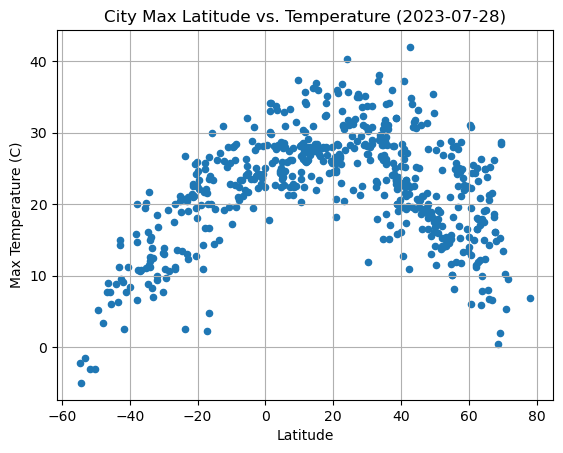

In [8]:
# Build scatter plot for latitude vs. temperature
today = date.today()
#date.today code sourced and adapted from https://www.geeksforgeeks.org/get-current-date-using-python/

city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Max Latitude vs. Temperature ({today})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

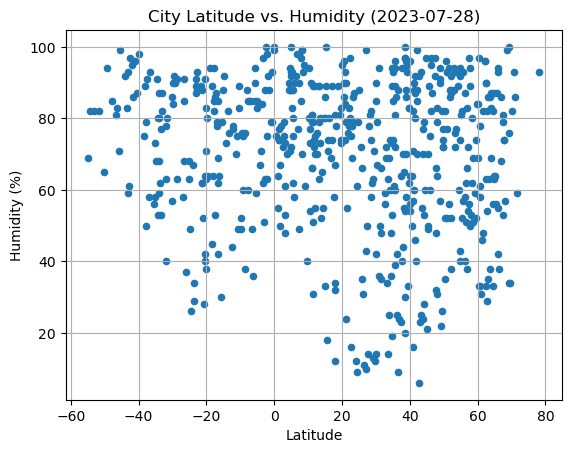

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({today})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

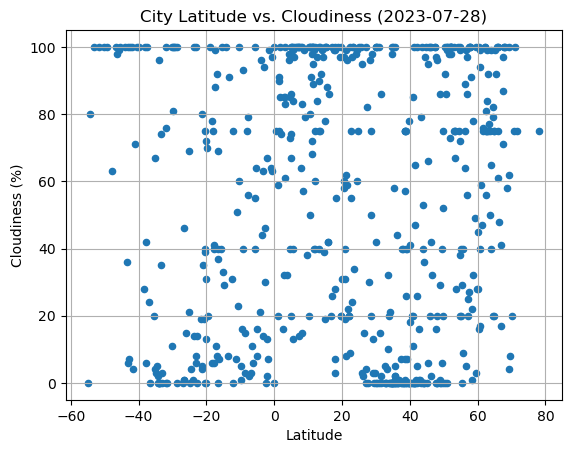

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({today})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

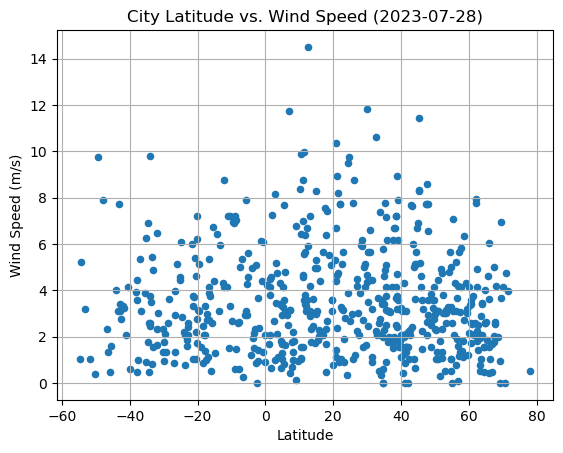

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({today})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_reg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel("Latitude")
    print(f"The r-value is: {rvalue**2}")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,xy=(a, b),fontsize=15,color="red")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fuglafjordur,62.2440,-6.8140,11.26,96,100,7.93,FO,1690524994
2,colonia,50.9333,6.9500,19.12,93,100,3.09,DE,1690524801
3,kurmuk,10.5500,34.2833,24.56,73,80,1.09,SD,1690524996
4,olonkinbyen,70.9221,-8.7187,5.29,86,100,4.75,SJ,1690524996
5,kembe,4.6228,21.8865,22.42,94,40,0.66,CF,1690524997


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,afaahiti,-17.7500,-149.2833,24.93,85,41,3.34,PF,1690524994
6,el calafate,-50.3408,-72.2768,-3.12,65,100,0.39,AR,1690524997
7,vallegrande,-18.4897,-64.1069,10.89,89,78,0.88,BO,1690524998
11,waitangi,-43.9535,-176.5597,8.79,92,100,4.02,NZ,1690525001
12,avarua,-21.2078,-159.7750,21.03,88,80,1.03,CK,1690525001


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3155213020758655


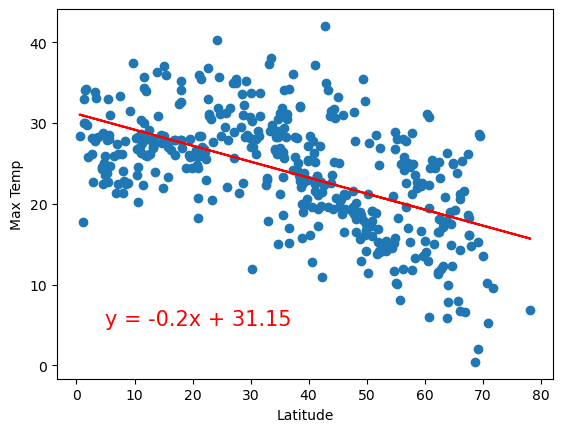

In [15]:
# Linear regression on Northern Hemisphere
regress1 = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
annotate(regress1, 5, 5)
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.6373390154573505


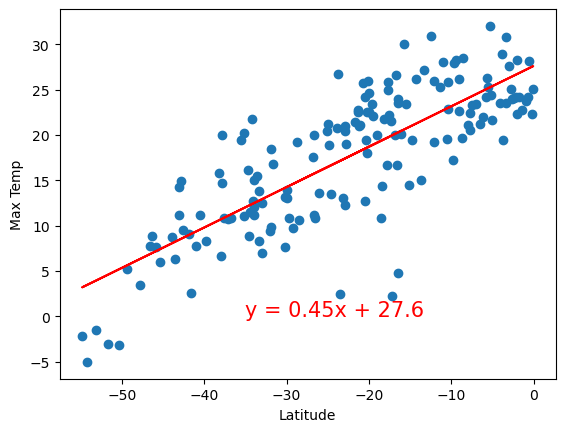

In [16]:
# Linear regression on Southern Hemisphere
regress2 = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
annotate(regress2, -35, 0)
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** There is a moderate linear relationship between Max Temperature and Latitude in the Southern Hemisphere (0.64) as opposed to the Northern Hemisphere (0.31) which indicates a weaker relationship however, this soley based on the random sample data so the reflected relationship or lack thereof can change with each random sampling.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.005194986530177327


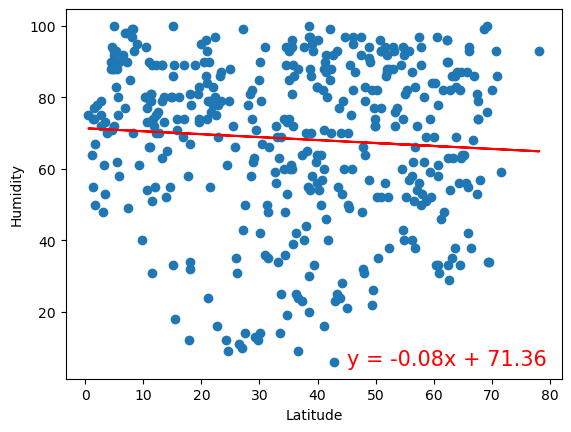

In [17]:
# Northern Hemisphere
regress3 = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
annotate(regress3, 45, 5)
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.0033235559887341308


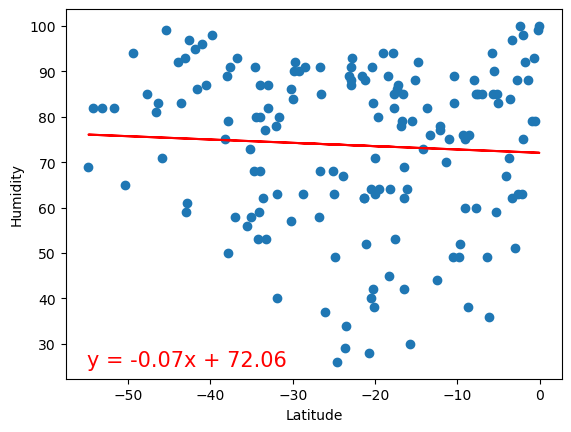

In [18]:
# Southern Hemisphere
regress4 = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
annotate(regress4, -55, 25)
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** The large dispersion of the results in the plot along with the very low r value indicates no linear relationship between Humidity and Latitude across both the Northern and Southern Hemishperes.  There is also a larger sampling representative of the Northern Hemishpere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0072849033494198885


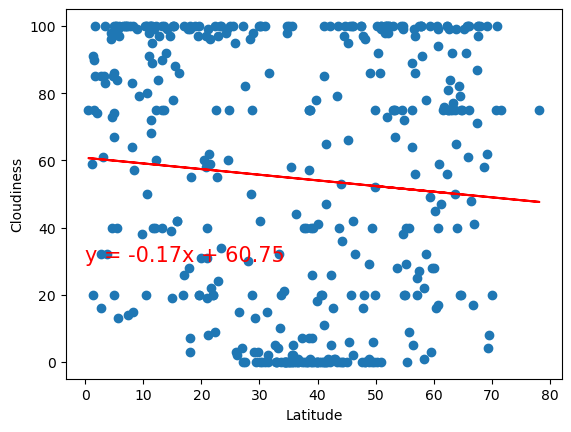

In [19]:
# Northern Hemisphere
regress5 = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
annotate(regress5, 0, 30)
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.021966772014874656


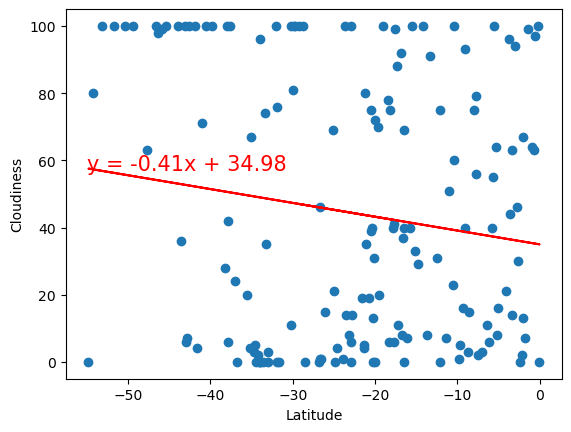

In [20]:
# Southern Hemisphere
regress6 = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
annotate(regress6, -55, 57)
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** The large dispersion of the results in the plot along with the very low r value indicates no linear relationship between Cloudiness and Latitude across both the Northern and Southern Hemishperes.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02509598544486626


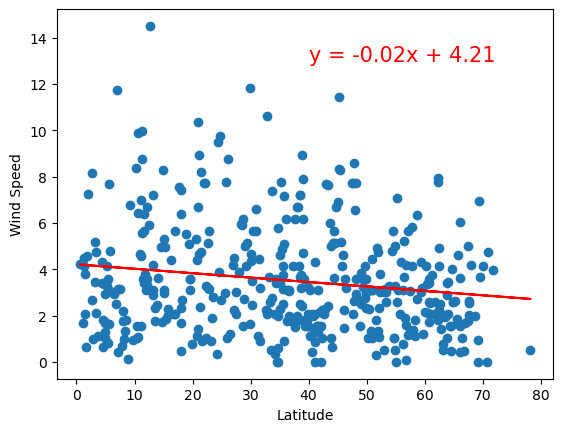

In [21]:
# Northern Hemisphere
regress7 = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
annotate(regress7, 40, 13)
plt.ylabel("Wind Speed")
plt.show()

The r-value is: 0.001463150509474482


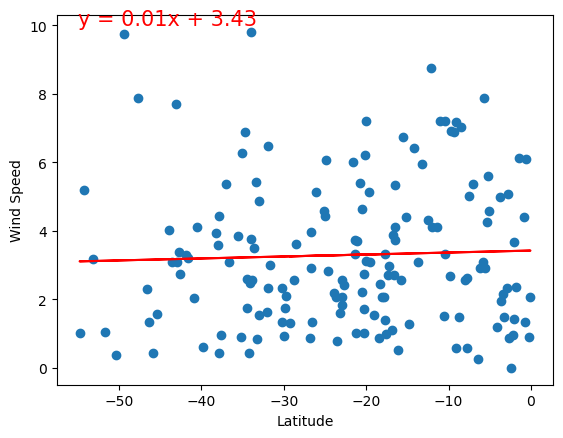

In [22]:
# Southern Hemisphere
regress8 = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
annotate(regress8, -55, 10)
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** The large dispersion of the results in the plot along with the very low r value indicates no linear relationship between Wind Speed and Latitude across both the Northern and Southern Hemishperes.